In [1]:
import torch
import pandas as pd

In [11]:
n = 100
xyz = torch.normal(mean=torch.tensor([1.0, -1.0, 2.0]).expand((n,3)))

In [13]:
xyz

tensor([[ 1.3431e+00,  1.4302e+00,  2.6936e+00],
        [ 8.3134e-01, -2.0464e+00,  2.5174e+00],
        [ 6.0782e-01, -1.7260e+00,  6.1512e-01],
        [-1.3298e-01, -1.2571e+00,  1.8663e+00],
        [ 7.6726e-01, -1.9105e+00,  1.1436e+00],
        [-7.6524e-01, -1.9735e+00,  2.4634e+00],
        [ 1.2709e+00,  3.3413e-01,  7.0826e-01],
        [ 1.3327e+00, -1.5198e+00,  1.2147e+00],
        [ 2.1339e+00, -1.8166e+00,  2.1366e+00],
        [ 1.0302e+00, -6.9743e-01,  5.4741e-01],
        [ 1.9399e-01, -7.1057e-01,  1.9566e+00],
        [-4.7645e-01, -3.4989e-01,  7.3911e-01],
        [ 1.0481e+00, -4.1808e-01,  1.8415e+00],
        [ 1.7140e+00, -5.4543e-01,  3.9463e+00],
        [ 2.0743e+00, -4.0772e-01,  4.1259e+00],
        [ 1.5748e+00, -2.9626e-01,  2.7701e+00],
        [ 1.0704e+00, -1.5734e+00,  1.2238e+00],
        [ 2.1121e-01, -1.3251e+00,  3.0927e+00],
        [ 7.8551e-01, -6.7306e-01,  1.4914e+00],
        [-3.7994e-01,  2.6164e-01,  3.3132e+00],
        [ 1.6498e+00

In [20]:
alpha = [
    torch.tensor(1.0).exp(), 
    torch.pi, 
    0.5 * (1.0 +torch.sqrt(torch.tensor(5.0)))
]
alpha = torch.tensor(alpha)
alpha

tensor([2.7183, 3.1416, 1.6180])

In [29]:
e = torch.normal(mean=torch.zeros(n), std=0.01 * torch.ones(n))
w = xyz @ alpha + e

In [30]:
df = pd.DataFrame()
df["x"] = xyz[:, 0]
df["y"] = xyz[:, 1]
df["z"] = xyz[:, 2]
df["w"] = w
df

,x,y,z,w
0,1.343114,1.430186,2.693590,12.522816
1,0.831336,-2.046429,2.517389,-0.084809
2,0.607821,-1.725985,0.615121,-2.777417
3,-0.132979,-1.257057,1.866271,-1.299914
4,0.767262,-1.910461,1.143629,-2.059190
...,...,...,...,...
95,-0.423793,-1.452749,1.444964,-3.372359
96,2.930738,-0.394542,1.632535,9.381154
97,2.778341,0.829761,2.399228,14.040586
98,1.692054,-0.864231,0.564075,2.795322


In [31]:
df.to_csv("xyzw.csv")

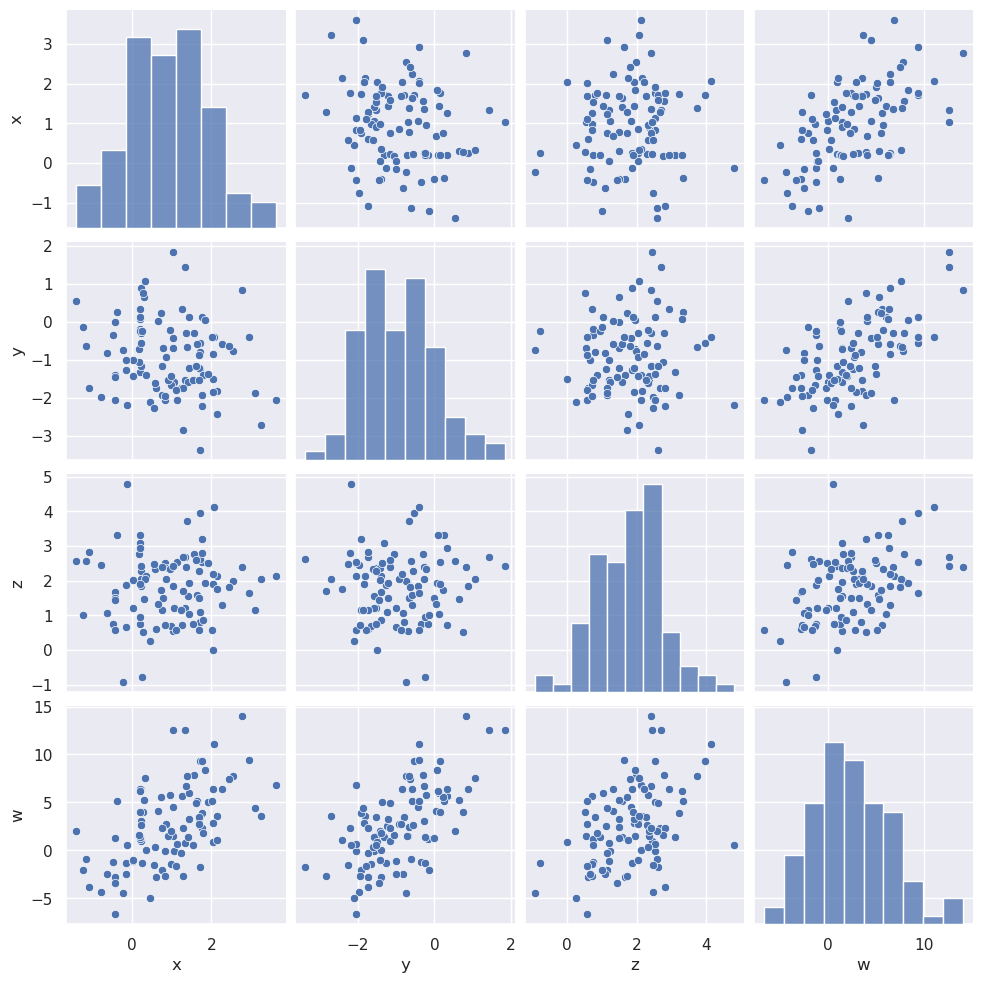

In [32]:
import seaborn as sns
sns.set_theme()
sns.pairplot(df)

In [33]:
df["e"] = w - xyz @alpha

In [34]:
df

,x,y,z,w,e
0,1.343114,1.430186,2.693590,12.522816,0.020470
1,0.831336,-2.046429,2.517389,-0.084809,0.011214
2,0.607821,-1.725985,0.615121,-2.777417,-0.002592
3,-0.132979,-1.257057,1.866271,-1.299914,-0.008967
4,0.767262,-1.910461,1.143629,-2.059190,0.006634
...,...,...,...,...,...
95,-0.423793,-1.452749,1.444964,-3.372359,0.005573
96,2.930738,-0.394542,1.632535,9.381154,0.012575
97,2.778341,0.829761,2.399228,14.040586,-0.000532
98,1.692054,-0.864231,0.564075,2.795322,-0.001789


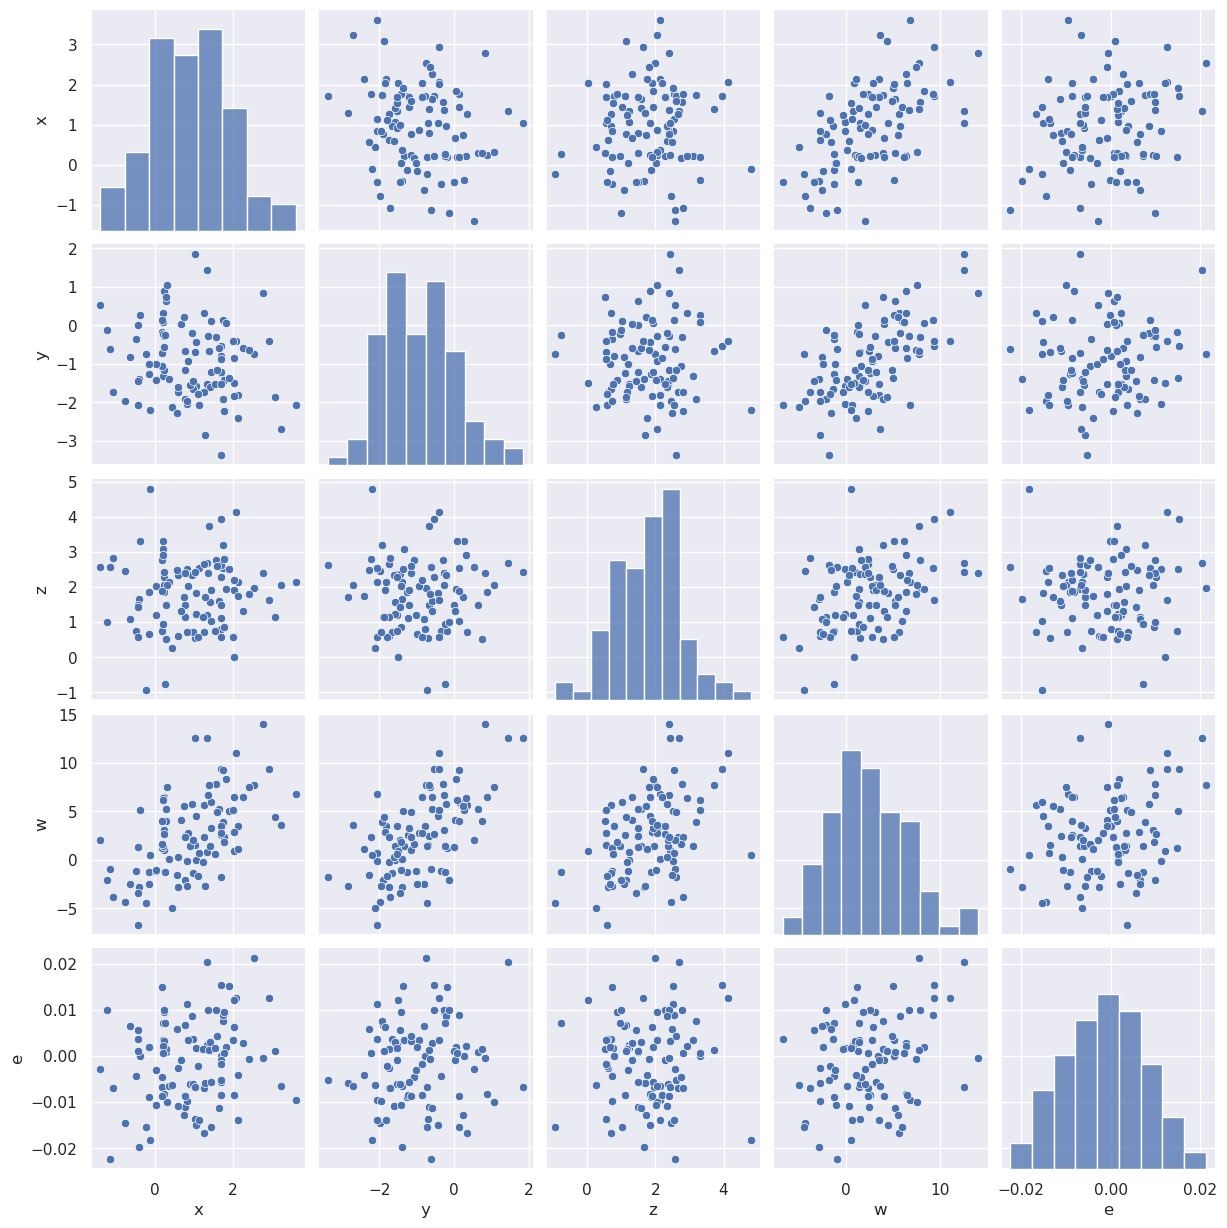

In [35]:
sns.pairplot(df)